In [32]:
#%matplotlib inline
import ROOT
ROOT.gSystem.Load("/home/dhruv/RooUnfold/libRooUnfold")
from ROOT import gRandom, TH1, TH1D, cout
#for unfolding
from ROOT import RooUnfoldResponse
from ROOT import RooUnfold
from ROOT import RooUnfoldBayes
from ROOT import RooUnfoldSvd
from ROOT import RooUnfoldTUnfold
#plotting, style
from matplotlib import pyplot as plt
ROOT.gStyle.SetOptStat('')
from AtlasCommonUtils import SetAtlasStyle
from Legend import Legend
from ROOT import TLatex
from array import array
#SetAtlasStyle()
ROOT.gStyle.SetPalette(ROOT.kViridis);
#numpy
import numpy as np


### Get Data and MC files

In [33]:
#pPb
#MCfile_name0 = '/home/dhruv/13b2_16_21bins_1GeV30GeV_4L_Allevents.root'
#MCfile_name1 = '/home/dhruv/13b2_16_51bins_publishedBinning15GeV_1Mevents_noNormalize_allReco.root'
MCfile_name1 = '/home/dhruv/13b2_16_51bins_publishedBinning15GeV_1Mevents_newChiCut_noNormalize_allReco.root'
#MCfile_name2 = '/home/dhruv/13b2_16_37bins_publishedBinning15GeV_1Mevents_noNormalize_allReco_new.root'
#MCfile_name3 = '/home/dhruv/13b2_16_58bins_publishedBinning15GeV_1Mevents_noNormalize_allReco_new.root'
#MCfile_name3 = '/home/dhruv/13b2_16_37bins_publishedBinning15GeV_Allevents_noNormalize_allReco_new.root'
#MCfile_name3 = '/home/dhruv/17g6a1_16_37bins_publishedBinning15GeV_Allevents_noNormalize_allReco_new.root'
#MCfile_name4 = '/home/dhruv/17l3b_16_37bins_publishedBinning15GeV_10Mevents_noNormalize_allReco_new.root'
#MCfile_name5 = '/home/dhruv/13b2_3_51bins_publishedBinning15GeV_5Mevents_noNormalize_allReco.root'

#MCfile_name5 = '/home/dhruv/17g6a1_16_51bins_publishedBinning15GeV_100kevents_noNormalize_allReco.root'
#MCfile_name5 = '/home/dhruv/17g6a1_3_51bins_publishedBinning15GeV_5Mevents_noNormalize_allReco.root'
MCfile_name5 = '/home/dhruv/17g6a1_16_51bins_publishedBinning15GeV_1Mevents_newChiCut_noNormalize_allReco.root'

#MCfile0 = ROOT.TFile(MCfile_name0)
MCfile1 = ROOT.TFile(MCfile_name1)
#MCfile2 = ROOT.TFile(MCfile_name2)
#MCfile3 = ROOT.TFile(MCfile_name3)
#MCfile4 = ROOT.TFile(MCfile_name4)
MCfile5 = ROOT.TFile(MCfile_name5)


## Get response Matrix, normalize it, plot it

In [13]:
responseMatrix_counts00 = MCfile0.Get("hCorrelation_cor");
responseMatrix_counts00.SetTitle(';Truth p_{T} [GeV/c];Reconstructed p_{T} [GeV/c]')


#print (responseMatrix_counts00.GetBinContent(0,0))
#print (responseMatrix_counts00.GetBinContent(responseMatrix_counts00.GetNbinsX()+1,responseMatrix_counts00.GetNbinsY()+1))
        
#responseMatrix_counts00.GetXaxis().SetRangeUser(1,15)
#responseMatrix_counts00.GetYaxis().SetRangeUser(1,15)

mc_truth_counts00 = responseMatrix_counts00.ProjectionX()
mc_reco_counts00 = responseMatrix_counts00.ProjectionY()


mc_truth_counts00.SetLineColorAlpha(2,0.8)
mc_reco_counts00.SetLineColorAlpha(4,0.8)

for ibin in range(1, mc_reco_counts00.GetNbinsX()+1):
    dpt = mc_reco_counts00.GetBinWidth(ibin)
    mc_reco_counts00.SetBinContent(ibin, mc_reco_counts00.GetBinContent(ibin)/dpt)
    mc_truth_counts00.SetBinContent(ibin, mc_truth_counts00.GetBinContent(ibin)/dpt)



##draw mc truth, mc reco, response matrix
c = ROOT.TCanvas('c','c',1600,600)
c.Divide(3)
c.cd(1)
#c = ROOT.TCanvas('c','c',800,1600)
#c.Divide(1,3)
#c.cd(1)
responseMatrix_counts00.SetMinimum(1e-8)

responseMatrix_counts00.Draw('colz')
ROOT.gPad.SetLogz()
c.cd(2)

#label = Legend("")
#label.Add(mc_reco_counts00,'MC Reco','L')
#label.Add(mc_truth_counts00,'MC True','L')
#hs_mc = ROOT.THStack()
#hs_mc.Add(mc_reco)
#hs_mc.Add(mc_truth)
#hs_mc.Draw('nostacke')

#mc_reco_counts00.GetXaxis().SetRangeUser(1,15)
#mc_truth_counts00.GetXaxis().SetRangeUser(1,15)
mc_reco_counts00.SetTitle('; p_{T} [GeV/c]; dN/dPtc')
mc_reco_counts00.Draw('histe')
mc_truth_counts00.SetTitle('; p_{T} [GeV/c]; dN/dPt')
mc_truth_counts00.Draw('histesame')


#label.Draw(0.5,.87)
ROOT.gPad.SetLogy()
c.cd(3)
ratio_mc_counts00 = mc_truth_counts00.Clone()
ratio_mc_counts00.SetMinimum(0.0)
ratio_mc_counts00.SetLineColor(1)
ratio_mc_counts00.SetMarkerStyle(5)
#ratio_mc_counts00.GetXaxis().SetRangeUser(1,15)
ratio_mc_counts00.Divide(mc_reco_counts00)
ratio_mc_counts00.Draw('e')
ratio_mc_counts00.SetTitle(' ; p_{T} [GeV/c]; Truth/Reco')
c.Update()
c.Draw()

#c.SaveAs('Matrix_tracking_its_MBMC_0GeV15GeV_dNdPt.pdf')
#c.SaveAs('reWeighted_response_pPb.png')

for i in range(ratio_mc_counts00.GetNbinsX()+1):
    low = ratio_mc_counts00.GetBinLowEdge(i)
    center =   ratio_mc_counts00.GetBinCenter(i)
    high = ratio_mc_counts00.GetBinLowEdge(i+1)
    content =  ratio_mc_counts00.GetBinContent(i)
    print (low, '\t', center, '\t', high, '\t',content)

NameError: name 'MCfile0' is not defined

5.018313407897949
2.3929183043946978e-06
0.0 	 0.5 	 1.0 	 0.0
1.0 	 1.5 	 2.0 	 1.0070615909045548
2.0 	 2.5 	 3.0 	 0.98241150896389
3.0 	 3.5 	 4.0 	 0.9572722803128543
4.0 	 4.5 	 5.0 	 0.9256248591866238
5.0 	 5.5 	 6.0 	 0.8941102990743524
6.0 	 6.5 	 7.0 	 0.8528047229294256
7.0 	 7.5 	 8.0 	 0.8169316712622369
8.0 	 8.5 	 9.0 	 0.7574468246803998
9.0 	 9.5 	 10.0 	 0.6809895842225937
10.0 	 10.5 	 11.0 	 0.6732788862414327
11.0 	 11.5 	 12.0 	 0.6190476130300314
12.0 	 12.5 	 13.0 	 0.4690721609543869
13.0 	 13.5 	 14.0 	 0.34163701288073284
14.0 	 14.5 	 15.0 	 0.30143540145173425


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


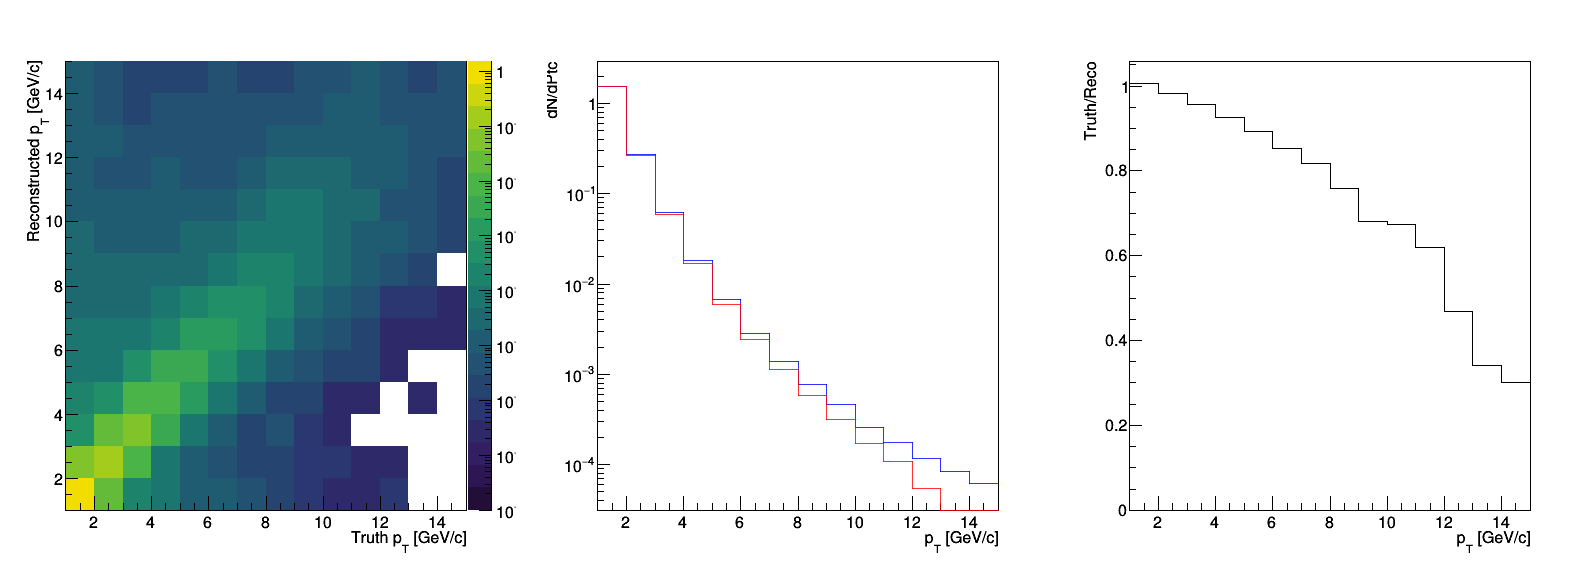

In [29]:
responseMatrix_counts0 = MCfile0.Get("hCorrelation_cor");
responseMatrix_counts0.SetTitle(';Truth p_{T} [GeV/c];Reconstructed p_{T} [GeV/c]')

print (responseMatrix_counts0.GetBinContent(0,0))
print (responseMatrix_counts0.GetBinContent(responseMatrix_counts0.GetNbinsX()+1,responseMatrix_counts0.GetNbinsY()+1))
        
responseMatrix_counts00.GetXaxis().SetRangeUser(1,15)
responseMatrix_counts00.GetYaxis().SetRangeUser(1,15)

mc_truth_counts0 = responseMatrix_counts0.ProjectionX()
mc_reco_counts0 = responseMatrix_counts0.ProjectionY()


mc_truth_counts0.SetLineColorAlpha(2,0.8)
mc_reco_counts0.SetLineColorAlpha(4,0.8)

##draw mc truth, mc reco, response matrix
c = ROOT.TCanvas('c','c',1600,600)
c.Divide(3)
c.cd(1)
#c = ROOT.TCanvas('c','c',800,1600)
#c.Divide(1,3)
#c.cd(1)
responseMatrix_counts0.SetMinimum(1e-8)
#responseMatrix_counts0.GetXaxis().SetRangeUser(1,15)
#responseMatrix_counts0.GetYaxis().SetRangeUser(1,15)
responseMatrix_counts0.Draw('colz')
ROOT.gPad.SetLogz()
c.cd(2)

#label = Legend("")
#label.Add(mc_reco_counts0,'MC Reco','L')
#label.Add(mc_truth_counts0,'MC True','L')
#mc_reco_counts0.GetXaxis().SetRangeUser(1,15)
#mc_truth_counts0.GetXaxis().SetRangeUser(1,15)
#hs_mc = ROOT.THStack()
#hs_mc.Add(mc_reco)
#hs_mc.Add(mc_truth)
#hs_mc.Draw('nostacke')

for ibin in range(1, mc_reco_counts0.GetNbinsX()+1):
    dpt = mc_reco_counts0.GetBinWidth(ibin)
    mc_reco_counts0.SetBinContent(ibin, mc_reco_counts0.GetBinContent(ibin)/dpt)
    mc_truth_counts0.SetBinContent(ibin, mc_truth_counts0.GetBinContent(ibin)/dpt)
mc_reco_counts0.SetTitle('; p_{T} [GeV/c]; dN/dPtc')
mc_reco_counts0.Draw('histe')
mc_truth_counts0.SetTitle('; p_{T} [GeV/c]; dN/dPt')
mc_truth_counts0.Draw('histesame')


#label.Draw(0.5,.87)
ROOT.gPad.SetLogy()
c.cd(3)
ratio_mc_counts0 = mc_truth_counts0.Clone()
ratio_mc_counts0.SetMinimum(0.0)
ratio_mc_counts0.SetLineColor(1)
ratio_mc_counts0.SetMarkerStyle(5)
#ratio_mc_counts0.GetXaxis().SetRangeUser(1,15)
ratio_mc_counts0.Divide(mc_reco_counts0)
ratio_mc_counts0.Draw('e')
ratio_mc_counts0.SetTitle(' ; p_{T} [GeV/c]; Truth/Reco')
c.Update()
c.Draw()

#c.SaveAs('Matrix_tracking_its_MBMC_0GeV15GeV_dNdPt.pdf')
#c.SaveAs('reWeighted_response_pPb.png')

for i in range(ratio_mc_counts0.GetNbinsX()+1):
    low = ratio_mc_counts0.GetBinLowEdge(i)
    center =   ratio_mc_counts0.GetBinCenter(i)
    high = ratio_mc_counts0.GetBinLowEdge(i+1)
    content =  ratio_mc_counts0.GetBinContent(i)
    print (low, '\t', center, '\t', high, '\t',content)

# mcfile1

0.0
62.0
-0.14117647058823532 	 0.004411764705882337 	 0.15 	 0.0
0.15 	 0.175 	 0.2 	 0.8918048254046212
0.2 	 0.225 	 0.25 	 0.9933456781792458
0.25 	 0.275 	 0.3 	 1.000973630514752
0.3 	 0.32499999999999996 	 0.35 	 1.010001125808522
0.35 	 0.375 	 0.4 	 1.0100758625106585
0.4 	 0.42500000000000004 	 0.45 	 1.0107654707287088
0.45 	 0.475 	 0.5 	 1.0097587586374108
0.5 	 0.525 	 0.55 	 1.011162462148384
0.55 	 0.575 	 0.6 	 1.0102706939866484
0.6 	 0.625 	 0.65 	 1.0065373226103982
0.65 	 0.675 	 0.7 	 1.0055527735718794
0.7 	 0.725 	 0.75 	 1.0045715067896968
0.75 	 0.775 	 0.8 	 1.0022956179432911
0.8 	 0.825 	 0.85 	 0.9959845883033593
0.85 	 0.875 	 0.9 	 0.992549901602474
0.9 	 0.925 	 0.95 	 0.9918254735181536
0.95 	 0.975 	 1.0 	 0.9904584194060086
1.0 	 1.05 	 1.1 	 0.9890689561323206
1.1 	 1.15 	 1.2 	 0.9883945459629271
1.2 	 1.25 	 1.3 	 0.9905340627468353
1.3 	 1.35 	 1.4 	 0.9900727537479607
1.4 	 1.45 	 1.5 	 0.9871785693366049
1.5 	 1.55 	 1.6 	 0.9940190067926431
1.

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


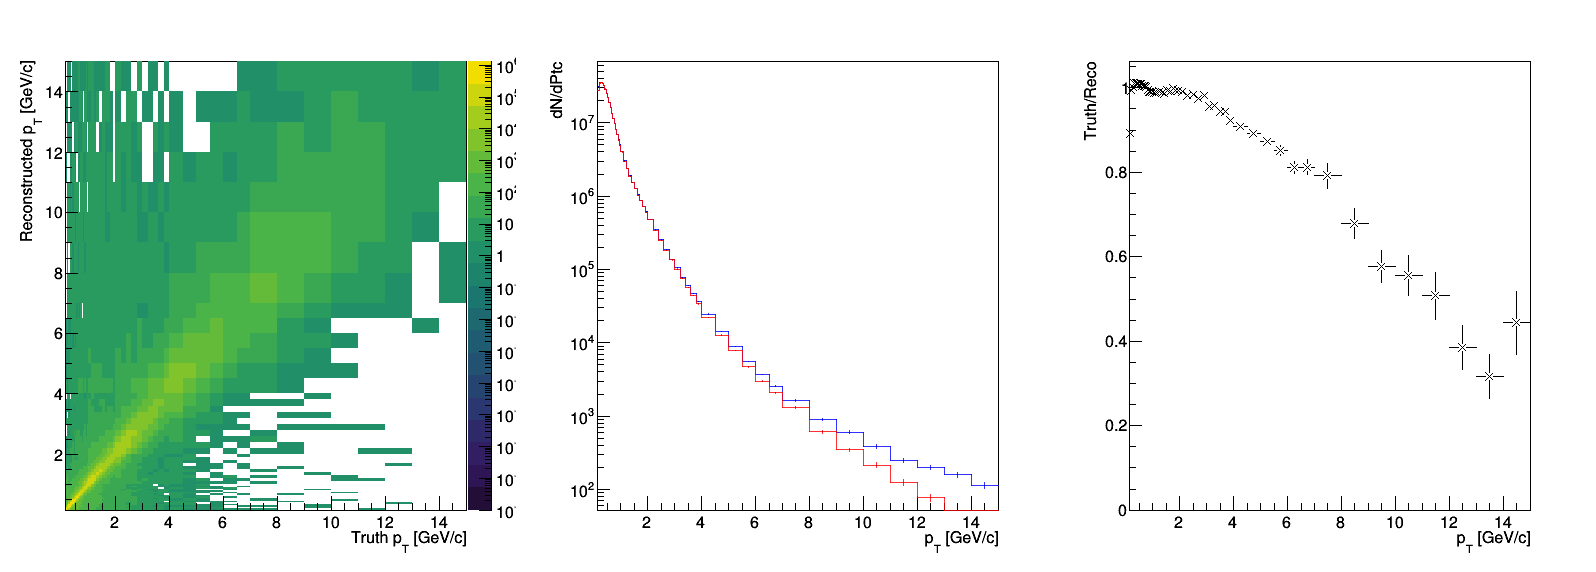

In [23]:
responseMatrix_counts1 = MCfile1.Get("hCorrelation");
responseMatrix_counts1.SetTitle(';Truth p_{T} [GeV/c];Reconstructed p_{T} [GeV/c]')

print (responseMatrix_counts1.GetBinContent(0,0))
print (responseMatrix_counts1.GetBinContent(responseMatrix_counts1.GetNbinsX()+1,responseMatrix_counts1.GetNbinsY()+1))
        
mc_truth_counts1 = responseMatrix_counts1.ProjectionX()
mc_reco_counts1 = responseMatrix_counts1.ProjectionY()


mc_truth_counts1.SetLineColorAlpha(2,0.8)
mc_reco_counts1.SetLineColorAlpha(4,0.8)

##draw mc truth, mc reco, response matrix
c = ROOT.TCanvas('c','c',1600,600)
c.Divide(3)
c.cd(1)
#c = ROOT.TCanvas('c','c',800,1600)
#c.Divide(1,3)
#c.cd(1)
responseMatrix_counts1.SetMinimum(1e-8)
#responseMatrix_counts1.GetXaxis().SetRangeUser(1,15)
#responseMatrix_counts1.GetYaxis().SetRangeUser(1,15)
responseMatrix_counts1.Draw('colz')
ROOT.gPad.SetLogz()
c.cd(2)

#label = Legend("")
#label.Add(mc_reco_counts1,'MC Reco','L')
#label.Add(mc_truth_counts1,'MC True','L')
#mc_reco_counts1.GetXaxis().SetRangeUser(1,15)
#mc_truth_counts1.GetXaxis().SetRangeUser(1,15)
#hs_mc = ROOT.THStack()
#hs_mc.Add(mc_reco)
#hs_mc.Add(mc_truth)
#hs_mc.Draw('nostacke')

for ibin in range(1, mc_reco_counts1.GetNbinsX()+1):
    dpt = mc_reco_counts1.GetBinWidth(ibin)
    mc_reco_counts1.SetBinContent(ibin, mc_reco_counts1.GetBinContent(ibin)/dpt)
    mc_truth_counts1.SetBinContent(ibin, mc_truth_counts1.GetBinContent(ibin)/dpt)
mc_reco_counts1.SetTitle('; p_{T} [GeV/c]; dN/dPtc')
mc_reco_counts1.Draw('histe')
mc_truth_counts1.SetTitle('; p_{T} [GeV/c]; dN/dPt')
mc_truth_counts1.Draw('histesame')


#label.Draw(0.5,.87)
ROOT.gPad.SetLogy()
c.cd(3)
ratio_mc_counts1 = mc_truth_counts1.Clone()
ratio_mc_counts1.SetMinimum(0.0)
ratio_mc_counts1.SetLineColor(1)
ratio_mc_counts1.SetMarkerStyle(5)
#ratio_mc_counts1.GetXaxis().SetRangeUser(1,15)
ratio_mc_counts1.Divide(mc_reco_counts1)
ratio_mc_counts1.Draw('e')
ratio_mc_counts1.SetTitle(' ; p_{T} [GeV/c]; Truth/Reco')
c.Update()
c.Draw()

#c.SaveAs('Matrix_tracking_its_MBMC_0GeV15GeV_dNdPt.pdf')
#c.SaveAs('reWeighted_response_pPb.png')

for i in range(ratio_mc_counts1.GetNbinsX()+1):
    low = ratio_mc_counts1.GetBinLowEdge(i)
    center =   ratio_mc_counts1.GetBinCenter(i)
    high = ratio_mc_counts1.GetBinLowEdge(i+1)
    content =  ratio_mc_counts1.GetBinContent(i)
    print (low, '\t', center, '\t', high, '\t',content)

# mcfile2

In [16]:
responseMatrix_counts2 = MCfile2.Get("hCorrelation");
responseMatrix_counts2.SetTitle(';Truth p_{T} [GeV/c];Reconstructed p_{T} [GeV/c]')

print (responseMatrix_counts2.GetBinContent(0,0))
print (responseMatrix_counts2.GetBinContent(responseMatrix_counts2.GetNbinsX()+1,responseMatrix_counts2.GetNbinsY()+1))
        
mc_truth_counts2 = responseMatrix_counts2.ProjectionX()
mc_reco_counts2 = responseMatrix_counts2.ProjectionY()


mc_truth_counts2.SetLineColorAlpha(2,0.8)
mc_reco_counts2.SetLineColorAlpha(4,0.8)

##draw mc truth, mc reco, response matrix
c = ROOT.TCanvas('c','c',1600,600)
c.Divide(3)
c.cd(1)
#c = ROOT.TCanvas('c','c',800,1600)
#c.Divide(1,3)
#c.cd(1)
responseMatrix_counts2.SetMinimum(1e-8)
#responseMatrix_counts2.GetXaxis().SetRangeUser(1,15)
#responseMatrix_counts2.GetYaxis().SetRangeUser(1,15)
responseMatrix_counts2.Draw('colz')
ROOT.gPad.SetLogz()
c.cd(2)

#label = Legend("")
#label.Add(mc_reco_counts2,'MC Reco','L')
#label.Add(mc_truth_counts2,'MC True','L')
#mc_reco_counts2.GetXaxis().SetRangeUser(1,15)
#mc_truth_counts2.GetXaxis().SetRangeUser(1,15)
#hs_mc = ROOT.THStack()
#hs_mc.Add(mc_reco)
#hs_mc.Add(mc_truth)
#hs_mc.Draw('nostacke')

for ibin in range(1, mc_reco_counts2.GetNbinsX()+1):
    dpt = mc_reco_counts2.GetBinWidth(ibin)
    mc_reco_counts2.SetBinContent(ibin, mc_reco_counts2.GetBinContent(ibin)/dpt)
    mc_truth_counts2.SetBinContent(ibin, mc_truth_counts2.GetBinContent(ibin)/dpt)
mc_reco_counts2.SetTitle('; p_{T} [GeV/c]; dN/dPtc')
mc_reco_counts2.Draw('histe')
mc_truth_counts2.SetTitle('; p_{T} [GeV/c]; dN/dPt')
mc_truth_counts2.Draw('histesame')


#label.Draw(0.5,.87)
ROOT.gPad.SetLogy()
c.cd(3)
ratio_mc_counts2 = mc_truth_counts2.Clone()
ratio_mc_counts2.SetMinimum(0.0)
ratio_mc_counts2.SetLineColor(1)
ratio_mc_counts2.SetMarkerStyle(5)
#ratio_mc_counts2.GetXaxis().SetRangeUser(1,15)
ratio_mc_counts2.Divide(mc_reco_counts2)
ratio_mc_counts2.Draw('e')
ratio_mc_counts2.SetTitle(' ; p_{T} [GeV/c]; Truth/Reco')
c.Update()
c.Draw()

#c.SaveAs('Matrix_tracking_its_MBMC_0GeV15GeV_dNdPt.pdf')
#c.SaveAs('reWeighted_response_pPb.png')

for i in range(ratio_mc_counts2.GetNbinsX()+1):
    low = ratio_mc_counts2.GetBinLowEdge(i)
    center =   ratio_mc_counts2.GetBinCenter(i)
    high = ratio_mc_counts2.GetBinLowEdge(i+1)
    content =  ratio_mc_counts2.GetBinContent(i)
    print (low, '\t', center, '\t', high, '\t',content)

NameError: name 'MCfile2' is not defined

# mcfile3

0.0
183.0
-0.38648648648648654 	 -0.11824324324324326 	 0.15 	 0.0
0.15 	 0.175 	 0.2 	 0.8945015343515567
0.2 	 0.225 	 0.25 	 0.9935756031360541
0.25 	 0.275 	 0.3 	 1.0027068214082115
0.3 	 0.32499999999999996 	 0.35 	 1.0077919816164047
0.35 	 0.375 	 0.4 	 1.0091298983266401
0.4 	 0.42500000000000004 	 0.45 	 1.0105990206172328
0.45 	 0.475 	 0.5 	 1.0101002686743066
0.5 	 0.525 	 0.55 	 1.0106295245732633
0.55 	 0.575 	 0.6 	 1.0089947470098075
0.6 	 0.625 	 0.65 	 1.0068990812051866
0.65 	 0.675 	 0.7 	 1.0057915660528387
0.7 	 0.725 	 0.75 	 1.0028018157936074
0.75 	 0.775 	 0.8 	 1.0003192313686824
0.8 	 0.825 	 0.85 	 0.9965583097236004
0.85 	 0.875 	 0.9 	 0.9936500577225331
0.9 	 0.925 	 0.95 	 0.9917793052578063
0.95 	 0.975 	 1.0 	 0.9883670328595059
1.0 	 1.05 	 1.1 	 0.9886062459777591
1.1 	 1.15 	 1.2 	 0.9876028153132467
1.2 	 1.2999999999999998 	 1.4 	 0.989024802189012
1.4 	 1.5 	 1.6 	 0.9913871864758056
1.6 	 1.7000000000000002 	 1.8 	 0.9952269158326585
1.8 	 1.9

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


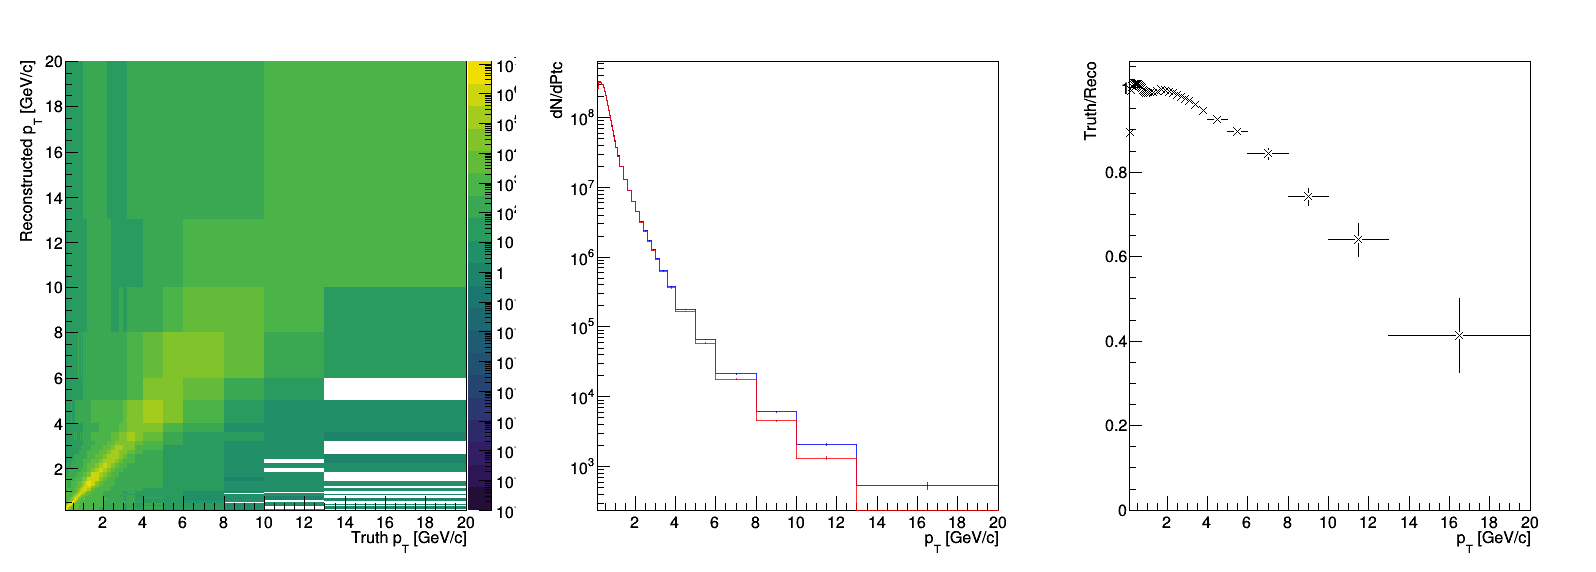

In [32]:
responseMatrix_counts3 = MCfile3.Get("hCorrelation");
responseMatrix_counts3.SetTitle(';Truth p_{T} [GeV/c];Reconstructed p_{T} [GeV/c]')

print (responseMatrix_counts3.GetBinContent(0,0))
print (responseMatrix_counts3.GetBinContent(responseMatrix_counts3.GetNbinsX()+1,responseMatrix_counts3.GetNbinsY()+1))
        
mc_truth_counts3 = responseMatrix_counts3.ProjectionX()
mc_reco_counts3 = responseMatrix_counts3.ProjectionY()


mc_truth_counts3.SetLineColorAlpha(2,0.8)
mc_reco_counts3.SetLineColorAlpha(4,0.8)

##draw mc truth, mc reco, response matrix
c = ROOT.TCanvas('c','c',1600,600)
c.Divide(3)
c.cd(1)
#c = ROOT.TCanvas('c','c',800,1600)
#c.Divide(1,3)
#c.cd(1)
responseMatrix_counts3.SetMinimum(1e-8)
#responseMatrix_counts3.GetXaxis().SetRangeUser(1,15)
#responseMatrix_counts3.GetYaxis().SetRangeUser(1,15)
responseMatrix_counts3.Draw('colz')
ROOT.gPad.SetLogz()
c.cd(2)

#label = Legend("")
#label.Add(mc_reco_counts3,'MC Reco','L')
#label.Add(mc_truth_counts3,'MC True','L')
#mc_reco_counts3.GetXaxis().SetRangeUser(1,15)
#mc_truth_counts3.GetXaxis().SetRangeUser(1,15)
#hs_mc = ROOT.THStack()
#hs_mc.Add(mc_reco)
#hs_mc.Add(mc_truth)
#hs_mc.Draw('nostacke')

for ibin in range(1, mc_reco_counts3.GetNbinsX()+1):
    dpt = mc_reco_counts3.GetBinWidth(ibin)
    mc_reco_counts3.SetBinContent(ibin, mc_reco_counts3.GetBinContent(ibin)/dpt)
    mc_truth_counts3.SetBinContent(ibin, mc_truth_counts3.GetBinContent(ibin)/dpt)
mc_reco_counts3.SetTitle('; p_{T} [GeV/c]; dN/dPtc')
mc_reco_counts3.Draw('histe')
mc_truth_counts3.SetTitle('; p_{T} [GeV/c]; dN/dPt')
mc_truth_counts3.Draw('histesame')


#label.Draw(0.5,.87)
ROOT.gPad.SetLogy()
c.cd(3)
ratio_mc_counts3 = mc_truth_counts3.Clone()
ratio_mc_counts3.SetMinimum(0.0)
ratio_mc_counts3.SetLineColor(1)
ratio_mc_counts3.SetMarkerStyle(5)
#ratio_mc_counts3.GetXaxis().SetRangeUser(1,15)
ratio_mc_counts3.Divide(mc_reco_counts3)
ratio_mc_counts3.Draw('e')
ratio_mc_counts3.SetTitle(' ; p_{T} [GeV/c]; Truth/Reco')
c.Update()
c.Draw()

#c.SaveAs('Matrix_tracking_its_MBMC_0GeV15GeV_dNdPt.pdf')
#c.SaveAs('reWeighted_response_pPb.png')

for i in range(ratio_mc_counts3.GetNbinsX()+1):
    low = ratio_mc_counts3.GetBinLowEdge(i)
    center =   ratio_mc_counts3.GetBinCenter(i)
    high = ratio_mc_counts3.GetBinLowEdge(i+1)
    content =  ratio_mc_counts3.GetBinContent(i)
    print (low, '\t', center, '\t', high, '\t',content)

# mcfile4

0.0
82.0
-0.38648648648648654 	 -0.11824324324324326 	 0.15 	 0.0
0.15 	 0.175 	 0.2 	 0.8967955557491896
0.2 	 0.225 	 0.25 	 0.9924488466978012
0.25 	 0.275 	 0.3 	 0.999580060726297
0.3 	 0.32499999999999996 	 0.35 	 1.00572576084619
0.35 	 0.375 	 0.4 	 1.0076631309039845
0.4 	 0.42500000000000004 	 0.45 	 1.0092704985836538
0.45 	 0.475 	 0.5 	 1.009074209376054
0.5 	 0.525 	 0.55 	 1.0099438516964534
0.55 	 0.575 	 0.6 	 1.0083107042657329
0.6 	 0.625 	 0.65 	 1.008150387311024
0.65 	 0.675 	 0.7 	 1.0062366801671725
0.7 	 0.725 	 0.75 	 1.005091081549767
0.75 	 0.775 	 0.8 	 1.003122159456292
0.8 	 0.825 	 0.85 	 1.0009226536874405
0.85 	 0.875 	 0.9 	 0.9963173785305489
0.9 	 0.925 	 0.95 	 0.9960949244151677
0.95 	 0.975 	 1.0 	 0.9931830425593635
1.0 	 1.05 	 1.1 	 0.9956411244831097
1.1 	 1.15 	 1.2 	 0.9934755136524345
1.2 	 1.2999999999999998 	 1.4 	 0.9948467262263105
1.4 	 1.5 	 1.6 	 0.9967376943110826
1.6 	 1.7000000000000002 	 1.8 	 0.9923241676291789
1.8 	 1.9 	 2.0 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


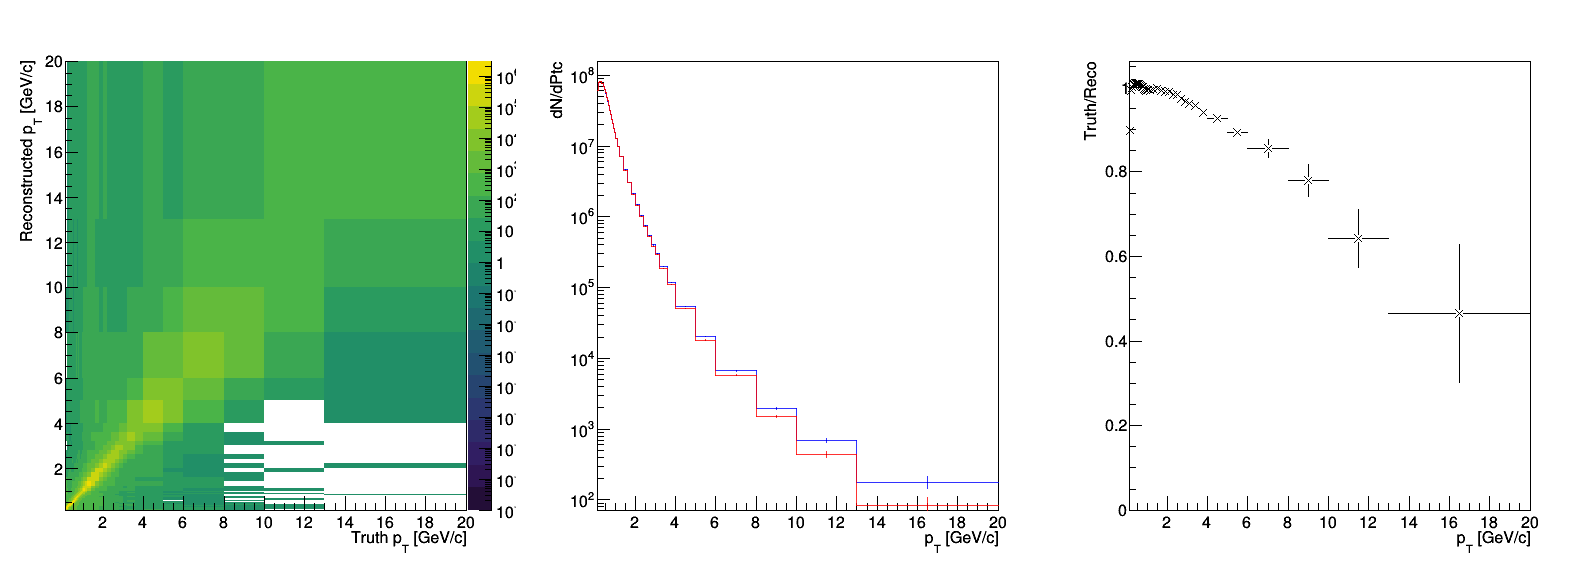

In [33]:
responseMatrix_counts4 = MCfile4.Get("hCorrelation");
responseMatrix_counts4.SetTitle(';Truth p_{T} [GeV/c];Reconstructed p_{T} [GeV/c]')

print (responseMatrix_counts4.GetBinContent(0,0))
print (responseMatrix_counts4.GetBinContent(responseMatrix_counts4.GetNbinsX()+1,responseMatrix_counts4.GetNbinsY()+1))
        
mc_truth_counts4 = responseMatrix_counts4.ProjectionX()
mc_reco_counts4 = responseMatrix_counts4.ProjectionY()


mc_truth_counts4.SetLineColorAlpha(2,0.8)
mc_reco_counts4.SetLineColorAlpha(4,0.8)

##draw mc truth, mc reco, response matrix
c = ROOT.TCanvas('c','c',1600,600)
c.Divide(3)
c.cd(1)
#c = ROOT.TCanvas('c','c',800,1600)
#c.Divide(1,3)
#c.cd(1)
responseMatrix_counts4.SetMinimum(1e-8)
#responseMatrix_counts4.GetXaxis().SetRangeUser(1,15)
#responseMatrix_counts4.GetYaxis().SetRangeUser(1,15)
responseMatrix_counts4.Draw('colz')
ROOT.gPad.SetLogz()
c.cd(2)

#label = Legend("")
#label.Add(mc_reco_counts4,'MC Reco','L')
#label.Add(mc_truth_counts4,'MC True','L')
#mc_reco_counts4.GetXaxis().SetRangeUser(1,15)
#mc_truth_counts4.GetXaxis().SetRangeUser(1,15)
#hs_mc = ROOT.THStack()
#hs_mc.Add(mc_reco)
#hs_mc.Add(mc_truth)
#hs_mc.Draw('nostacke')

for ibin in range(1, mc_reco_counts4.GetNbinsX()+1):
    dpt = mc_reco_counts4.GetBinWidth(ibin)
    mc_reco_counts4.SetBinContent(ibin, mc_reco_counts4.GetBinContent(ibin)/dpt)
    mc_truth_counts4.SetBinContent(ibin, mc_truth_counts4.GetBinContent(ibin)/dpt)
mc_reco_counts4.SetTitle('; p_{T} [GeV/c]; dN/dPtc')
mc_reco_counts4.Draw('histe')
mc_truth_counts4.SetTitle('; p_{T} [GeV/c]; dN/dPt')
mc_truth_counts4.Draw('histesame')


#label.Draw(0.5,.87)
ROOT.gPad.SetLogy()
c.cd(3)
ratio_mc_counts4 = mc_truth_counts4.Clone()
ratio_mc_counts4.SetMinimum(0.0)
ratio_mc_counts4.SetLineColor(1)
ratio_mc_counts4.SetMarkerStyle(5)
#ratio_mc_counts4.GetXaxis().SetRangeUser(1,15)
ratio_mc_counts4.Divide(mc_reco_counts4)
ratio_mc_counts4.Draw('e')
ratio_mc_counts4.SetTitle(' ; p_{T} [GeV/c]; Truth/Reco')
c.Update()
c.Draw()

#c.SaveAs('Matrix_tracking_its_MBMC_0GeV15GeV_dNdPt.pdf')
#c.SaveAs('reWeighted_response_pPb.png')

for i in range(ratio_mc_counts4.GetNbinsX()+1):
    low = ratio_mc_counts4.GetBinLowEdge(i)
    center =   ratio_mc_counts4.GetBinCenter(i)
    high = ratio_mc_counts4.GetBinLowEdge(i+1)
    content =  ratio_mc_counts4.GetBinContent(i)
    print (low, '\t', center, '\t', high, '\t',content)

# mcfile 5

0.8854287008271549
0.9913585288541809
1.0012138207595738
1.0075309924488458
1.010482599960753
1.011151108164293
1.0094944252066924
1.0105591294697962
1.0079137893649366
1.0092167267568568
1.0045861691558786
1.0079046578543036
0.9978255905952091
1.0007613540390605
0.9960067382542687
0.9956903725013864
0.9961202541662918
0.9919546740414046
0.9944834591437869
0.9964710175418504
0.9931512335321339
0.9949814729927442
0.9993650818959348
0.9960518200530167
0.9972621225178836
0.9933016649999629
0.9950719118223563
0.9925951463156193
0.9918535803550973
0.9881057214334197
0.9706481377241701
0.9821688513974002
0.9737664805985772
0.9716707515062224
0.9668273088287823
0.957893719411875
0.949872393318052
0.9607693493472578
0.941852719109068
0.9365308463598337
0.917153973349094
0.9197919339104873
0.9312638887435236
0.8822241195316509
0.8523247081831792
0.8447340764607356
0.7715079674070301
0.7649655643631739
0.702697047527488
0.6444127454180718


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


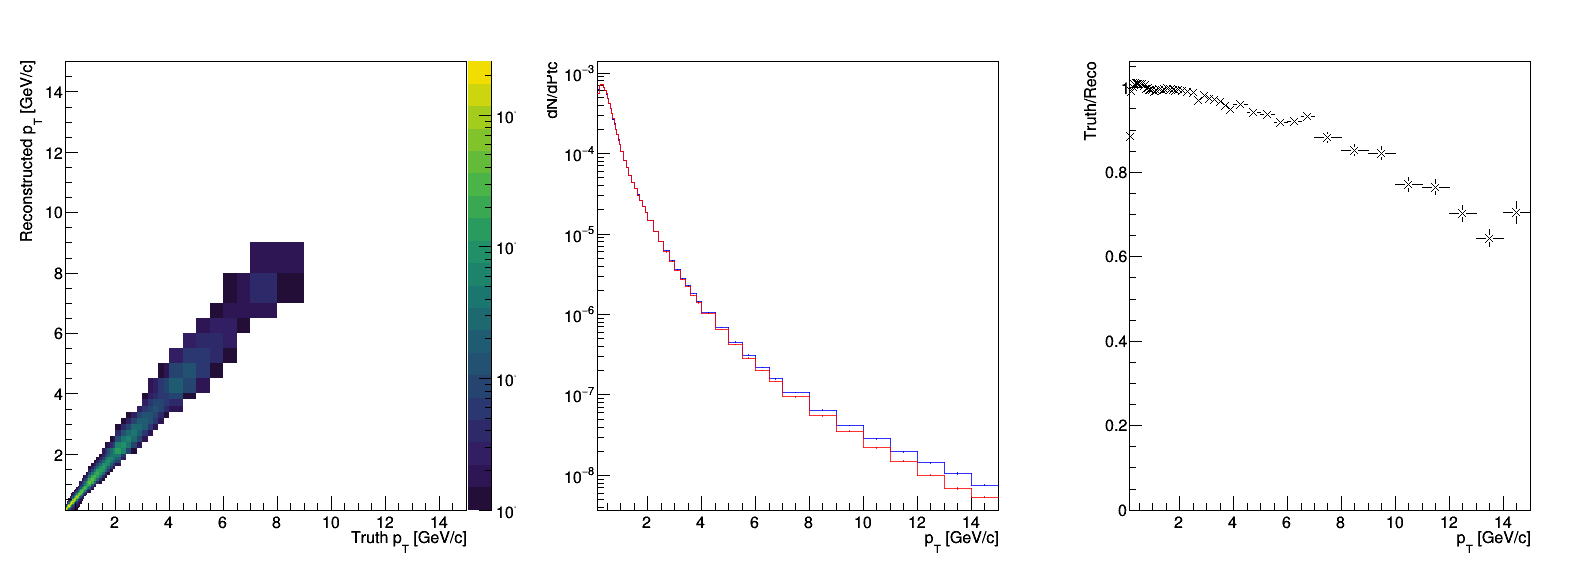

In [24]:
responseMatrix_counts5 = MCfile5.Get("hCorrelation");
responseMatrix_counts5.SetTitle(';Truth p_{T} [GeV/c];Reconstructed p_{T} [GeV/c]')

#print (responseMatrix_counts5.GetBinContent(0,0))
#print (responseMatrix_counts5.GetBinContent(responseMatrix_counts5.GetNbinsX()+1,responseMatrix_counts5.GetNbinsY()+1))
        
mc_truth_counts5 = responseMatrix_counts5.ProjectionX()
mc_reco_counts5 = responseMatrix_counts5.ProjectionY()


mc_truth_counts5.SetLineColorAlpha(2,0.8)
mc_reco_counts5.SetLineColorAlpha(4,0.8)

##draw mc truth, mc reco, response matrix
c = ROOT.TCanvas('c','c',1600,600)
c.Divide(3)
c.cd(1)
#c = ROOT.TCanvas('c','c',800,1600)
#c.Divide(1,3)
#c.cd(1)
responseMatrix_counts5.SetMinimum(1e-8)
#responseMatrix_counts5.GetXaxis().SetRangeUser(1,15)
#responseMatrix_counts5.GetYaxis().SetRangeUser(1,15)
responseMatrix_counts5.Draw('colz')
ROOT.gPad.SetLogz()
c.cd(2)

#label = Legend("")
#label.Add(mc_reco_counts5,'MC Reco','L')
#label.Add(mc_truth_counts5,'MC True','L')
#mc_reco_counts5.GetXaxis().SetRangeUser(1,15)
#mc_truth_counts5.GetXaxis().SetRangeUser(1,15)
#hs_mc = ROOT.THStack()
#hs_mc.Add(mc_reco)
#hs_mc.Add(mc_truth)
#hs_mc.Draw('nostacke')

for ibin in range(1, mc_reco_counts5.GetNbinsX()+1):
    dpt = mc_reco_counts5.GetBinWidth(ibin)
    mc_reco_counts5.SetBinContent(ibin, mc_reco_counts5.GetBinContent(ibin)/dpt)
    mc_truth_counts5.SetBinContent(ibin, mc_truth_counts5.GetBinContent(ibin)/dpt)
mc_reco_counts5.SetTitle('; p_{T} [GeV/c]; dN/dPtc')
mc_reco_counts5.Draw('histe')
mc_truth_counts5.SetTitle('; p_{T} [GeV/c]; dN/dPt')
mc_truth_counts5.Draw('histesame')


#label.Draw(0.5,.87)
ROOT.gPad.SetLogy()
c.cd(3)
ratio_mc_counts5 = mc_truth_counts5.Clone()
ratio_mc_counts5.SetMinimum(0.0)
ratio_mc_counts5.SetLineColor(1)
ratio_mc_counts5.SetMarkerStyle(5)
#ratio_mc_counts5.GetXaxis().SetRangeUser(1,15)
ratio_mc_counts5.Divide(mc_reco_counts5)
ratio_mc_counts5.Draw('e')
ratio_mc_counts5.SetTitle(' ; p_{T} [GeV/c]; Truth/Reco')
c.Update()
c.Draw()

#c.SaveAs('Matrix_tracking_its_MBMC_0GeV15GeV_dNdPt.pdf')
#c.SaveAs('reWeighted_response_pPb.png')

for i in range(1,ratio_mc_counts5.GetNbinsX()):
    low = ratio_mc_counts5.GetBinLowEdge(i)
    center =   ratio_mc_counts5.GetBinCenter(i)
    high = ratio_mc_counts5.GetBinLowEdge(i+1)
    content =  ratio_mc_counts5.GetBinContent(i)
    #print (low, '\t', center, '\t', high, '\t',content)
    print (content)

# Efficiency and Fake rate

### TPC+ITS

0.15 	 0.175 	 0.2 	 0.6409867405891418 	 0.0005881890899592031
0.2 	 0.225 	 0.25 	 0.8123647570610046 	 0.0006418564711433277
0.25 	 0.275 	 0.3 	 0.827538788318634 	 0.000646431407483095
0.3 	 0.32499999999999996 	 0.35 	 0.8413804769515991 	 0.0006666109788425972
0.35 	 0.375 	 0.4 	 0.8112432956695557 	 0.0006797710169986407
0.4 	 0.42500000000000004 	 0.45 	 0.7616493701934814 	 0.0006930629810765975
0.45 	 0.475 	 0.5 	 0.8401066064834595 	 0.0008466022556787595
0.5 	 0.525 	 0.55 	 0.852222204208374 	 0.0009191478546631847
0.55 	 0.575 	 0.6 	 0.8547393679618835 	 0.0009947085593364018
0.6 	 0.625 	 0.65 	 0.8567296862602234 	 0.001070516475433028
0.65 	 0.675 	 0.7 	 0.9001274108886719 	 0.0011902322728217663
0.7 	 0.725 	 0.75 	 0.8607400059700012 	 0.0012005861133865222
0.75 	 0.775 	 0.8 	 0.8582800626754761 	 0.0012918001447529762
0.8 	 0.825 	 0.85 	 0.8585506081581116 	 0.0014047203210691265
0.85 	 0.875 	 0.9 	 0.8594840168952942 	 0.001514314556367089
0.9 	 0.925 	 0.9

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file EfficiencyAndFakeRate_tracking_its_pPb_17g6a1_pPbpublishedGeV13GeV.png has been created


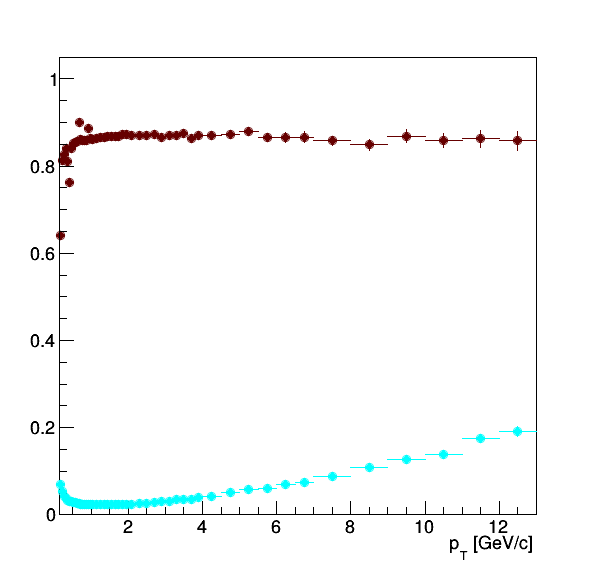

In [35]:
#Get efficiency and fake rate
efficiency5 = MCfile5.Get("hRecoTruth").Clone()#MCfile.Get("Efficiency")
efficiency5.Divide(MCfile5.Get("hTruth"))
fakerate5   = MCfile5.Get("FakeRate")

#Plot efficiency and fake rate
efficiency5.SetTitle(' ; p_{T} [GeV/c];')
efficiency5.SetMinimum(0.0)
efficiency5.SetMaximum(1.05)
efficiency5.SetMarkerStyle(20)
efficiency5.SetMarkerColor(ROOT.kRed+3)
efficiency5.SetLineColor(ROOT.kRed+3)
efficiency5.GetXaxis().SetRangeUser(0.15,13)
fakerate5.SetMarkerStyle(20)
fakerate5.SetLineColor(ROOT.kCyan)
fakerate5.SetMarkerColor(ROOT.kCyan)

c = ROOT.TCanvas('c','c',600,600)
#c.SetLogx()
#efficiency.Fit('pol0', '', '', 2,20)
efficiency5.Draw('e')
fakerate5.Draw('samee')

#label = Legend("MC: 13b2_efix_p1")
#label = Legend("")
#label.Add(efficiency,'Efficiency','L')
#label.Add(fakerate,'Fake rate','L')
#label.Draw(.25,.61)
c.Draw()
#c.SaveAs('EfficiencyAndFakeRate_tracking_its_0GeV15GeV.pdf')
#c.SaveAs('EfficiencyAndFakeRate_tracking_its_pPb_17g6a1_pPbpublishedGeV13GeV.png')

sum = 0.0
for i in range(1, efficiency5.GetNbinsX()):
    low = efficiency5.GetBinLowEdge(i)
    center =   efficiency5.GetBinCenter(i)
    high = efficiency5.GetBinLowEdge(i+1)
    content =  efficiency5.GetBinContent(i)
    error =  efficiency5.GetBinError(i)
    print (low, '\t', center, '\t', high, '\t', content, '\t', error)
    #print (content)#, '\t', content)
#    #sum += (error/content)**2

#print ("\n\n")

for i in range(1,fakerate5.GetNbinsX()):
    low = fakerate5.GetBinLowEdge(i)
    center =   fakerate5.GetBinCenter(i)
    high = fakerate5.GetBinLowEdge(i+1)
    content =  fakerate5.GetBinContent(i)
    #print (low, '\t', center, '\t', high, '\t',content)
    #print (content)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


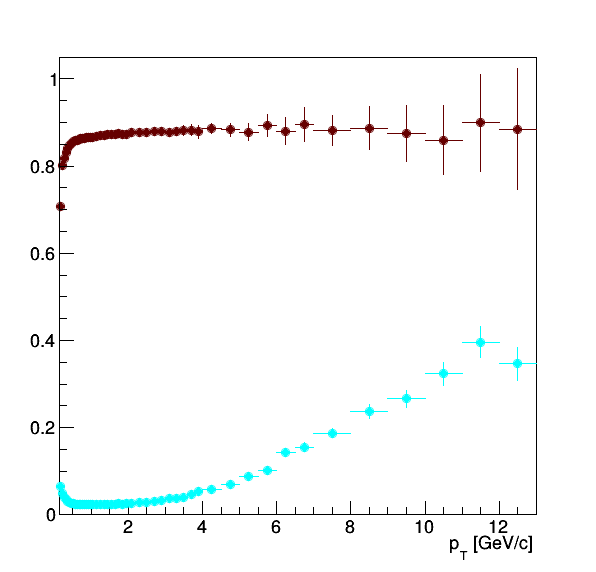

In [26]:
#Get efficiency and fake rate
efficiency1 = MCfile1.Get("hRecoTruth").Clone()#MCfile.Get("Efficiency")
efficiency1.Divide(MCfile1.Get("hTruth"))
fakerate1   = MCfile1.Get("FakeRate")

#Plot efficiency and fake rate
efficiency1.SetTitle(' ; p_{T} [GeV/c];')
efficiency1.SetMinimum(0.0)
efficiency1.SetMaximum(1.05)
efficiency1.SetMarkerStyle(20)
efficiency1.SetMarkerColor(ROOT.kRed+3)
efficiency1.SetLineColor(ROOT.kRed+3)
efficiency1.GetXaxis().SetRangeUser(0.15,13)
fakerate1.SetMarkerStyle(20)
fakerate1.SetLineColor(ROOT.kCyan)
fakerate1.SetMarkerColor(ROOT.kCyan)

c = ROOT.TCanvas('c','c',600,600)
#efficiency.Fit('pol0', '', '', 2,20)
efficiency1.Draw('e')
fakerate1.Draw('samee')

#label = Legend("MC: 13b2_efix_p1")
#label = Legend("")
#label.Add(efficiency,'Efficiency','L')
#label.Add(fakerate,'Fake rate','L')
#label.Draw(.22,.61)
c.Draw()
#c.SaveAs('EfficiencyAndFakeRate_tracking_its_0GeV12GeV.pdf')
#c.SaveAs('EfficiencyAndFakeRate_tracking_its_pPb_halfGeV13GeV.png')

sum = 0.0
for i in range(efficiency1.GetNbinsX()):
    low = efficiency1.GetBinLowEdge(i)
    center =   efficiency1.GetBinCenter(i)
    high = efficiency1.GetBinLowEdge(i+1)
    content =  efficiency1.GetBinContent(i)
    error =  efficiency1.GetBinError(i)
    #print (low, '\t', center, '\t', high, '\t', content, '\t', error, '\t', error/content)
#    #sum += (error/content)**2

#print ("\n\n")

#for i in range(fakerate.GetNbinsX()+1):
#    low = fakerate.GetBinLowEdge(i)
#    center =   fakerate.GetBinCenter(i)
#    high = fakerate.GetBinLowEdge(i+1)
#    content =  fakerate.GetBinContent(i)
#    print (low, '\t', center, '\t', high, '\t',content)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


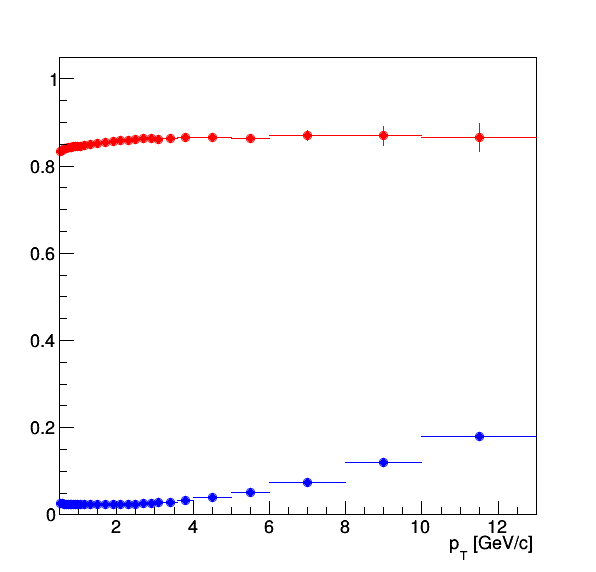

In [34]:
#Get efficiency and fake rate
efficiency4 = MCfile4.Get("hRecoTruth").Clone()#MCfile.Get("Efficiency")
efficiency4.Divide(MCfile4.Get("hTruth"))
fakerate4   = MCfile4.Get("FakeRate")

#Plot efficiency and fake rate
efficiency4.SetTitle(' ; p_{T} [GeV/c];')
efficiency4.SetMinimum(0.0)
efficiency4.SetMaximum(1.05)
efficiency4.SetMarkerStyle(20)
efficiency4.SetMarkerColor(ROOT.kRed)
efficiency4.SetLineColor(ROOT.kRed)
efficiency4.GetXaxis().SetRangeUser(0.5,13)
fakerate4.SetMarkerStyle(20)
fakerate4.SetLineColor(ROOT.kBlue)
fakerate4.SetMarkerColor(ROOT.kBlue)

c = ROOT.TCanvas('c','c',600,600)
#efficiency.Fit('pol0', '', '', 2,20)
efficiency4.Draw('e')
fakerate4.Draw('samee')

#label = Legend("MC: 13b2_efix_p1")
#label = Legend("")
#label.Add(efficiency,'Efficiency','L')
#label.Add(fakerate,'Fake rate','L')
#label.Draw(.25,.61)
c.Draw()
#c.SaveAs('EfficiencyAndFakeRate_tracking_its_0GeV15GeV.pdf')
#c.SaveAs('EfficiencyAndFakeRate_tracking_its_pPb_halfGeV13GeV.png')

sum = 0.0
#for i in range(efficiency.GetNbinsX()):
#    low = efficiency.GetBinLowEdge(i)
#    center =   efficiency.GetBinCenter(i)
#    high = efficiency.GetBinLowEdge(i+1)
#    content =  efficiency.GetBinContent(i)
#    error =  efficiency.GetBinError(i)
#    print (low, '\t', center, '\t', high, '\t', content, '\t', error, '\t', error/content)
#    #sum += (error/content)**2

#print ("\n\n")

#for i in range(fakerate.GetNbinsX()+1):
#    low = fakerate.GetBinLowEdge(i)
#    center =   fakerate.GetBinCenter(i)
#    high = fakerate.GetBinLowEdge(i+1)
#    content =  fakerate.GetBinContent(i)
#    print (low, '\t', center, '\t', high, '\t',content)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


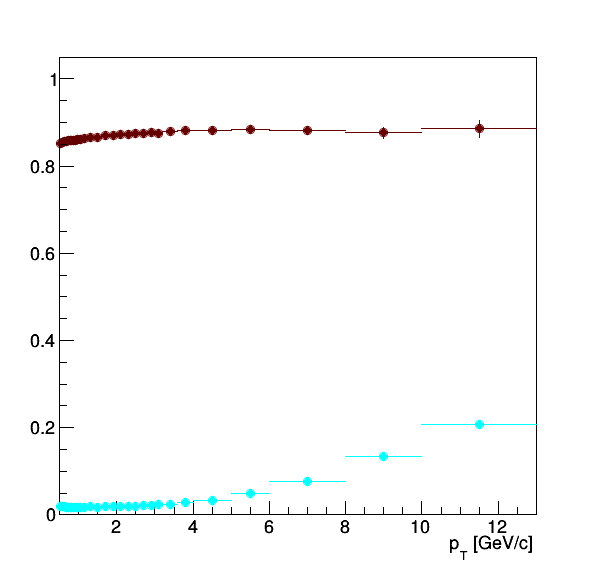

In [7]:
#Get efficiency and fake rate
efficiency3 = MCfile3.Get("hRecoTruth").Clone()#MCfile.Get("Efficiency")
efficiency3.Divide(MCfile3.Get("hTruth"))
fakerate3   = MCfile3.Get("FakeRate")

#Plot efficiency and fake rate
efficiency3.SetTitle(' ; p_{T} [GeV/c];')
efficiency3.SetMinimum(0.0)
efficiency3.SetMaximum(1.05)
efficiency3.SetMarkerStyle(20)
efficiency3.SetMarkerColor(ROOT.kRed+3)
efficiency3.SetLineColor(ROOT.kRed+3)
efficiency3.GetXaxis().SetRangeUser(0.5,13)
fakerate3.SetMarkerStyle(20)
fakerate3.SetLineColor(ROOT.kCyan)
fakerate3.SetMarkerColor(ROOT.kCyan)

c = ROOT.TCanvas('c','c',600,600)
#efficiency.Fit('pol0', '', '', 2,20)
efficiency3.Draw('e')
fakerate3.Draw('samee')

#label = Legend("MC: 13b2_efix_p1")
#label = Legend("")
#label.Add(efficiency,'Efficiency','L')
#label.Add(fakerate,'Fake rate','L')
#label.Draw(.25,.61)
c.Draw()
#c.SaveAs('EfficiencyAndFakeRate_tracking_its_0GeV15GeV.pdf')
#c.SaveAs('EfficiencyAndFakeRate_tracking_its_pPb_halfGeV13GeV.png')

sum = 0.0
#for i in range(efficiency.GetNbinsX()):
#    low = efficiency.GetBinLowEdge(i)
#    center =   efficiency.GetBinCenter(i)
#    high = efficiency.GetBinLowEdge(i+1)
#    content =  efficiency.GetBinContent(i)
#    error =  efficiency.GetBinError(i)
#    print (low, '\t', center, '\t', high, '\t', content, '\t', error, '\t', error/content)
#    #sum += (error/content)**2

#print ("\n\n")

#for i in range(fakerate.GetNbinsX()+1):
#    low = fakerate.GetBinLowEdge(i)
#    center =   fakerate.GetBinCenter(i)
#    high = fakerate.GetBinLowEdge(i+1)
#    content =  fakerate.GetBinContent(i)
#    print (low, '\t', center, '\t', high, '\t',content)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file trackCorrectionFactors_pPbAndpp.pdf has been created


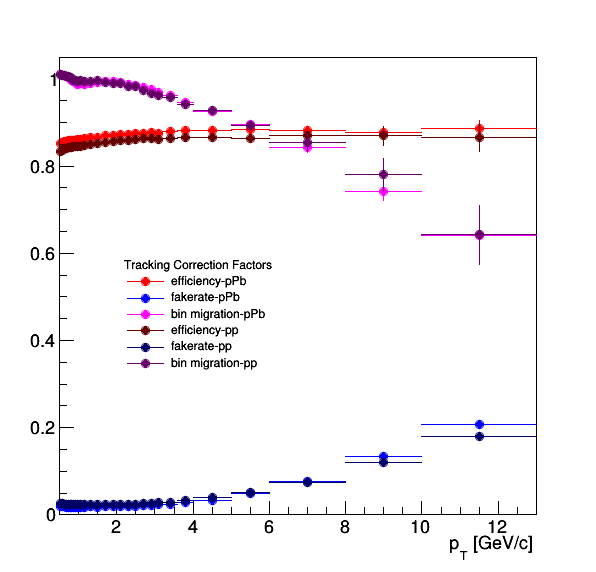

In [25]:
#pPb
efficiency3.SetLineColor(ROOT.kRed)
efficiency3.SetMarkerColor(ROOT.kRed)
efficiency3.SetMarkerStyle(20)

fakerate3.SetLineColor(ROOT.kBlue)
fakerate3.SetMarkerColor(ROOT.kBlue)
fakerate3.SetMarkerStyle(20)

ratio_mc_counts3.SetLineColor(ROOT.kMagenta)
ratio_mc_counts3.SetMarkerColor(ROOT.kMagenta)
ratio_mc_counts3.SetMarkerStyle(20)
ratio_mc_counts3.GetXaxis().SetRangeUser(0.5,20)

#pp
efficiency4.SetLineColor(ROOT.kRed+3)
efficiency4.SetMarkerColor(ROOT.kRed+3)
efficiency4.SetMarkerStyle(20)

fakerate4.SetLineColor(ROOT.kBlue+3)
fakerate4.SetMarkerColor(ROOT.kBlue+3)
fakerate4.SetMarkerStyle(20)

ratio_mc_counts4.SetLineColor(ROOT.kMagenta+3)#blue
ratio_mc_counts4.SetMarkerColor(ROOT.kMagenta+3)
ratio_mc_counts4.SetMarkerStyle(20)
ratio_mc_counts4.GetXaxis().SetRangeUser(0.5,13)

legend = ROOT.TLegend(0.2, 0.35, 0.55, 0.55)
legend.SetBorderSize(0)
legend.SetHeader("Tracking Correction Factors")
#legend.AddEntry(ratio_mc_counts00, "1 GeV binnning tracking study(\"corrected old\")")
#legend.AddEntry(ratio_mc_counts0, "1 GeV binnning tracking study wRangeSet 1-15 (old)")
#legend.AddEntry(ratio_mc_counts1, "variable binning(new)")
#legend.AddEntry(ratio_mc_counts2, "pp binning-sent to fernando")
#legend.AddEntry(ratio_mc_counts4, "all events pp binning")

#legend.AddEntry(efficiency3, "efficiency-pPb")
#legend.AddEntry(fakerate3, "fakerate-pPb")
#legend.AddEntry(ratio_mc_counts3, "bin migration-pPb")

#legend.AddEntry(efficiency4, "efficiency-pp")
#legend.AddEntry(fakerate4, "fakerate-pp")
#legend.AddEntry(ratio_mc_counts4, "bin migration-pp")



c = ROOT.TCanvas('c','c',600,600)
#ratio_mc_counts00.Draw('e')
#ratio_mc_counts0.Draw('samee')
#ratio_mc_counts1.Draw('samee')
#ratio_mc_counts2.Draw('samee')
#ratio_mc_counts3.Draw('samee')

efficiency3.Draw('e')
fakerate3.Draw('samee')
ratio_mc_counts3.Draw('samee')

efficiency4.Draw('samee')
fakerate4.Draw('samee')
ratio_mc_counts4.Draw('samee')


legend.Draw("same")
c.Update()
c.Draw()

#c.SaveAs("trackCorrectionFactors_pPbAndpp.png")
#c.SaveAs("trackCorrectionFactors_pPbAndpp.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


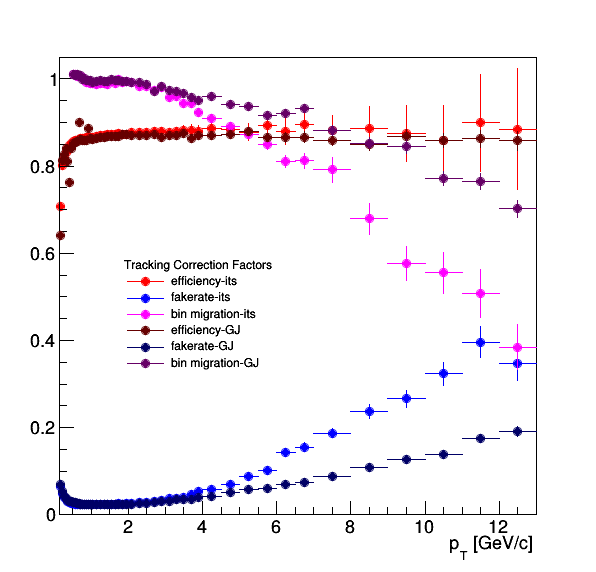

In [28]:
#pPb-its only
efficiency1.SetLineColor(ROOT.kRed)
efficiency1.SetMarkerColor(ROOT.kRed)
efficiency1.SetMarkerStyle(20)

fakerate1.SetLineColor(ROOT.kBlue)
fakerate1.SetMarkerColor(ROOT.kBlue)
fakerate1.SetMarkerStyle(20)

ratio_mc_counts1.SetLineColor(ROOT.kMagenta)
ratio_mc_counts1.SetMarkerColor(ROOT.kMagenta)
ratio_mc_counts1.SetMarkerStyle(20)
ratio_mc_counts1.GetXaxis().SetRangeUser(0.5,20)

#pPb-hybrid
efficiency5.SetLineColor(ROOT.kRed+3)
efficiency5.SetMarkerColor(ROOT.kRed+3)
efficiency5.SetMarkerStyle(20)

fakerate5.SetLineColor(ROOT.kBlue+3)
fakerate5.SetMarkerColor(ROOT.kBlue+3)
fakerate5.SetMarkerStyle(20)

ratio_mc_counts5.SetLineColor(ROOT.kMagenta+3)#blue
ratio_mc_counts5.SetMarkerColor(ROOT.kMagenta+3)
ratio_mc_counts5.SetMarkerStyle(20)
ratio_mc_counts5.GetXaxis().SetRangeUser(0.5,13)

legend = ROOT.TLegend(0.2, 0.35, 0.55, 0.55)
legend.SetBorderSize(0)
legend.SetHeader("Tracking Correction Factors")

legend.AddEntry(efficiency1, "efficiency-its")
legend.AddEntry(fakerate1, "fakerate-its")
legend.AddEntry(ratio_mc_counts1, "bin migration-its")
legend.AddEntry(efficiency5, "efficiency-GJ")
legend.AddEntry(fakerate5, "fakerate-GJ")
legend.AddEntry(ratio_mc_counts5, "bin migration-GJ")



c = ROOT.TCanvas('c','c',600,600)
#ratio_mc_counts00.Draw('e')
#ratio_mc_counts0.Draw('samee')
#ratio_mc_counts1.Draw('samee')
#ratio_mc_counts2.Draw('samee')
#ratio_mc_counts3.Draw('samee')

efficiency1.Draw('e')
fakerate1.Draw('samee')
ratio_mc_counts1.Draw('samee')

efficiency5.Draw('samee')
fakerate5.Draw('samee')
ratio_mc_counts5.Draw('samee')


legend.Draw("same")
c.Update()
c.Draw()

#c.SaveAs("trackCorrectionFactors_pPb_MBvGJ.png")
#c.SaveAs("trackCorrectionFactors_pPbA_its_MBvGJ_triggered.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


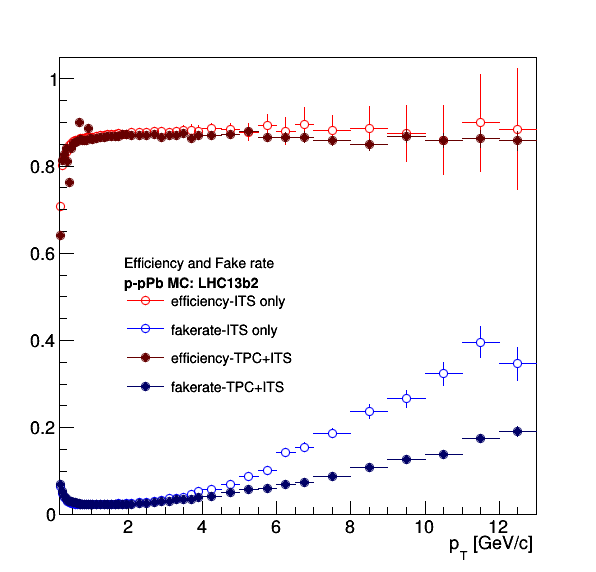

In [27]:
#its
efficiency1.SetLineColor(ROOT.kRed)
efficiency1.SetMarkerColor(ROOT.kRed)
efficiency1.SetMarkerStyle(24)

fakerate1.SetLineColor(ROOT.kBlue)
fakerate1.SetMarkerColor(ROOT.kBlue)
fakerate1.SetMarkerStyle(24)

#its+tpc
efficiency5.SetLineColor(ROOT.kRed+3)
efficiency5.SetMarkerColor(ROOT.kRed+3)
efficiency5.SetMarkerStyle(20)

fakerate5.SetLineColor(ROOT.kBlue+3)
fakerate5.SetMarkerColor(ROOT.kBlue+3)
fakerate5.SetMarkerStyle(20)


legend = ROOT.TLegend(0.2, 0.3, 0.55, 0.55)
legend.SetBorderSize(0)
legend.SetHeader("#splitline{Efficiency and Fake rate}{#bf{p-pPb MC: LHC13b2}}")


legend.AddEntry(efficiency1, "efficiency-ITS only")
legend.AddEntry(fakerate1, "fakerate-ITS only")
legend.AddEntry(efficiency5, "efficiency-TPC+ITS")
legend.AddEntry(fakerate5, "fakerate-TPC+ITS")


c = ROOT.TCanvas('c','c',600,600)

efficiency1.Draw('e')
fakerate1.Draw('samee')
efficiency5.Draw('samee')
fakerate5.Draw('samee')




legend.Draw("same")
c.Update()
c.Draw()

#c.SaveAs("HybridAndITS_Eff_fakerate_pPb_lowpt.pdf")

# Resolution

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file HybridAndITS_resolution_lowpt.pdf has been created


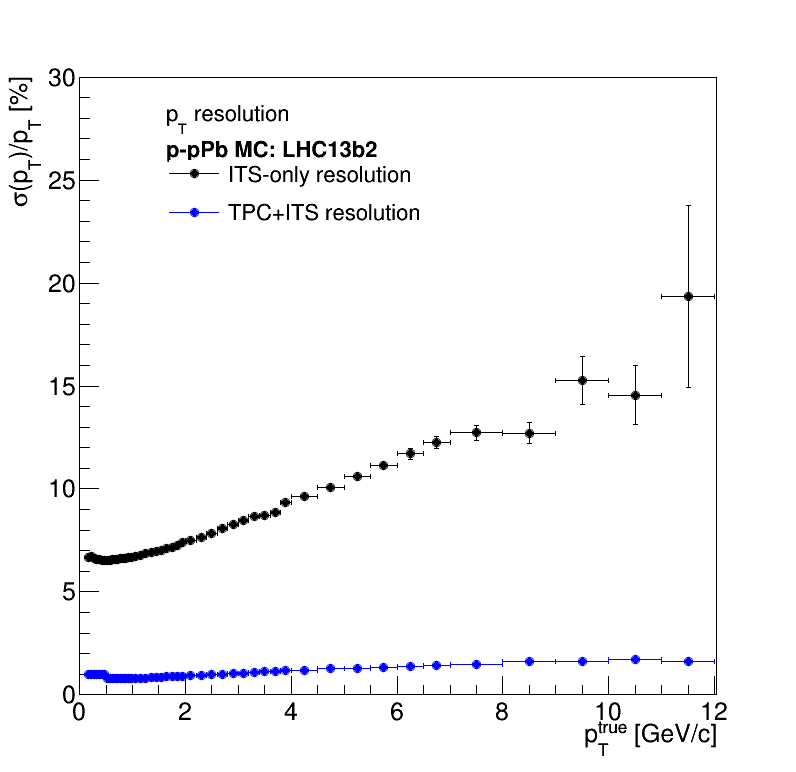

In [50]:
MCfile_its = ROOT.TFile('/home/dhruv/13b2_16_51bins_publishedBinning15GeV_1Mevents_noNormalize_allReco.root')
MCfile_tpc = ROOT.TFile('/home/dhruv/13b2_3_51bins_publishedBinning15GeV_5Mevents_noNormalize_allReco.root')

res_its = MCfile_its.Get('g_sigma')
res_its.SetLineColor(ROOT.kBlack)
res_its.SetFillColor(ROOT.kWhite)
res_its.SetMarkerColor(ROOT.kBlack)
res_its.SetMarkerStyle(20)
res_its.GetXaxis().SetTitle('p_{T}^{true} [GeV/c]')


res_tpc = MCfile_tpc.Get('g_sigma')
res_tpc.SetLineColor(ROOT.kBlue)
res_tpc.SetMarkerColor(ROOT.kBlue)
res_tpc.SetMarkerStyle(20)

res_its.SetMinimum(0.0)
res_its.GetXaxis().SetRangeUser(0.15,12.0)
res_its.GetYaxis().SetRangeUser(0, 30.0)
res_its.SetTitle('')
c= ROOT.TCanvas('c','c',800,800)

res_its.Draw('ap')
#res_5L.Draw('same')
res_tpc.Draw('same p')

legend = ROOT.TLegend(0.2, 0.7, 0.55, 0.85)
legend.SetBorderSize(0)
legend.SetFillStyle(0)
legend.SetHeader("#splitline{p_{T} resolution}{#bf{p-pPb MC: LHC13b2}}")


legend.AddEntry(res_its, "ITS-only resolution")
legend.AddEntry(res_tpc, "TPC+ITS resolution")
legend.Draw("same")

c.Draw()
#c.SaveAs('HybridAndITS_resolution_lowpt.pdf')
#c.SaveAs('ITS_resolution_30GeV.png')